In [26]:
from SVM import SVM
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

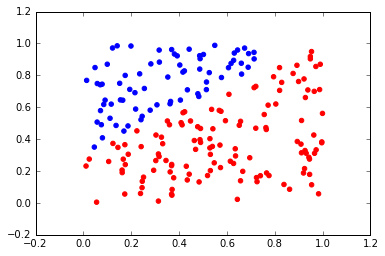

In [49]:
a = 6.4
b = -9
c = 2.8
def actual_function(x, y):
    res = a*x + b*y + c
    return 1 if res > 0 else -1

n_points = 200

data = np.array([(random.random(), random.random()) for i in range(n_points)])
labels = [actual_function(*d) for d in data]

train_data = data[:n_points//2]
train_labels = labels[:n_points//2]

test_data = data[n_points//2:]
test_labels = labels[n_points//2:]

plt.scatter(*data.T, color=['red' if l == 1 else 'blue' for l in labels])
plt.show()

/Users/tom/anaconda3/lib/python3.5/site-packages/matplotlib/figure.py:397: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


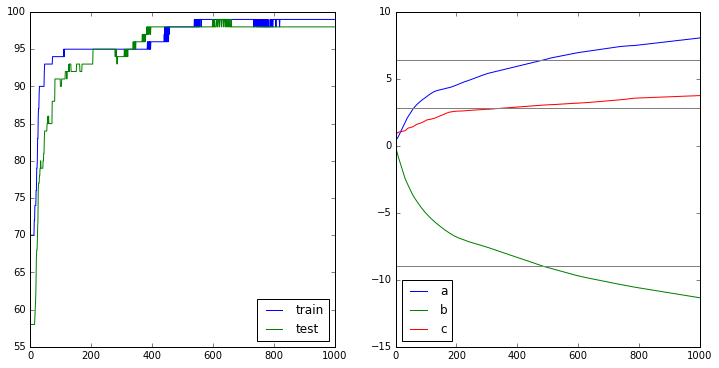

In [52]:
svm = SVM()
svm.regularisation = False
svm.step_size = 0.01
n_iter = 1000

test_eval = []
train_eval = []

def eval_model(model, data, labels):
    return sum([model.predict(d) == l for d, l in zip(data, labels)]) * 100.0 / len(labels)

a_est, b_est, c_est = [], [], []

for i in range(n_iter):
    a_est.append(svm.combiner.input_params[0].value)
    b_est.append(svm.combiner.input_params[1].value)
    c_est.append(svm.combiner.bias.value)
    for xy, l in zip(train_data, train_labels):
        pull = svm.train(xy, l)
    train_eval.append(eval_model(svm, train_data, train_labels))
    test_eval.append(eval_model(svm, test_data, test_labels))

fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(121)
ax1.plot(train_eval, label='train')
ax1.plot(test_eval, label='test')
ax1.legend(loc=4)

ax2 = fig.add_subplot(122)
ax2.plot(a_est, label='a')
ax2.plot(b_est, label='b')
ax2.plot(c_est, label='c')
ax2.axhline(a, color='grey')
ax2.axhline(b, color='grey')
ax2.axhline(c, color='grey')
ax2.legend(loc=3)

fig.show()